This is the Python code of the eigenfrequency example from the lecture on Plate Equations.

This code:
(C) Joris Remmers (2013-2019)


## Eigenfrequencies of a composite panel

Determine the eigenfrequencies of a rectangular composite panel with dimensions 300 by 200 mm, that is made of 6 layers of UCHSC200_SE84 material (UD) with a stacking sequence $\lbrack 0,90,0\rbrack_{\rm S}$.

## Solution

Import the correct functions from the composite module and required mathematical operators:

In [20]:
from composite    import TransverseIsotropic,mixMaterials,Laminate
from numpy        import array,dot,zeros
from numpy.linalg import inv
from math         import sin,pi,sqrt
import numpy as np

from   mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from   matplotlib import cm

Create a new material compUD with the correct input parameters

In [21]:
compUD = TransverseIsotropic( [130e9,7.2e9],0.337,4.2e9,[0.57e-6,35.1e-6],1514.)

print(compUD)

  Elastic Properties:
  -----------------------------------------------------------
  E1     :     1.300e+11 , E2     :     7.200e+09 
  nu12   :          0.34 , G12    :     4.200e+09 
  rho    :       1514.00

  Thermal expansion coefficients:
  -----------------------------------------------------------
  alpha1 :     5.700e-07 , alpha2 :     3.510e-05 



Create the laminate with the correct stacling sequence.

In [22]:
lam = Laminate()

lam.addMaterial( 'UCHSC200_SE84' , compUD )

lam.addLayer( 'UCHSC200_SE84' , 0  , 0.2e-3 )
lam.addLayer( 'UCHSC200_SE84' , 90 , 0.2e-3 )
lam.addLayer( 'UCHSC200_SE84' , 0  , 0.2e-3 )
lam.addLayer( 'UCHSC200_SE84' , 0  , 0.2e-3 )
lam.addLayer( 'UCHSC200_SE84' , 90 , 0.2e-3 )
lam.addLayer( 'UCHSC200_SE84' , 0  , 0.2e-3 )

print(lam)

  Laminate properties
  -----------------------------------------------------------
  layer   thick orient.  material
  -----------------------------------------------------------
      0   0.0002      0   UCHSC200_SE84
      1   0.0002     90   UCHSC200_SE84
      2   0.0002      0   UCHSC200_SE84
      3   0.0002      0   UCHSC200_SE84
      4   0.0002     90   UCHSC200_SE84
      5   0.0002      0   UCHSC200_SE84



Define the dimensions of panel (in meters!)

In [23]:
a = 0.3
b = 0.2

Calculate the stiffness matrix D and the term rho*h.

In [24]:
D = lam.getD()
rhoh = lam.getRhoh()

print("The matrix D :\n",D,"\n")
print("Rho * h      :\n",rhoh,"\n")

The matrix D :
 [[1.42249412e+01 3.51613239e-01 8.22090335e-18]
 [3.51613239e-01 5.65691519e+00 2.74277710e-16]
 [8.22090335e-18 2.74277710e-16 6.04800000e-01]] 

Rho * h      :
 1.8168000000000002 



Calculate the plate equation parameters D1, D2, D3.

In [25]:
D1 = D[0,0]
D2 = D[1,1]
D3 = D[0,1]+2*D[2,2]

print("D1: ",D1," D2: ",D2," D3: ",D3)

D1:  14.224941196641147  D2:  5.656915190635289  D3:  1.5612132386157986


Construct an x-y mesh with the correct dimensions for plotting the contour of the eigenmodes. Create an empty array wc for the amplitude.

In [26]:
x  = np.arange(0.0, 1.01*a , 0.01*a )
y  = np.arange(0.0, 1.01*b , 0.01*b )

x, y = np.meshgrid(x, y)

wc = np.zeros((101,101))

Loop over m and n to calculate the first 4 eigenfrequencies.

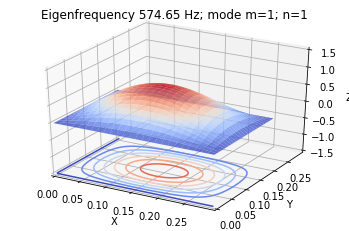

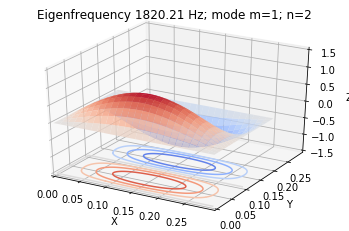

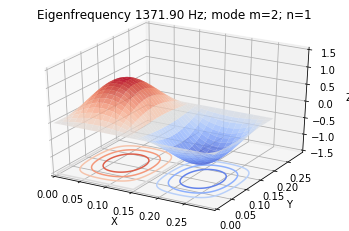

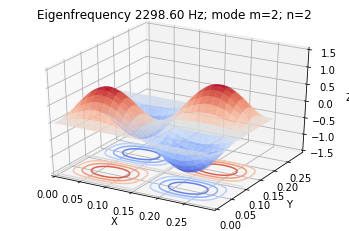

In [19]:
for m in range(1,3):
  for n in range(1,3):
     
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    freq= pi*pi/sqrt(rhoh)*sqrt(D1*(m/a)**4+2*D3*m*m*n*n/(a*a*b*b)+D2*(n/b)**4)

    for i in range(0,101):
      for j in range(0,101):
        wc[i,j] = sin(m*pi*x[i,j]/a)*sin(n*pi*y[i,j]/b)
    
   
    plt.title('Eigenfrequency '+str("%.2f" % freq)+' Hz; mode m='+str(m)+'; n='+str(n))
    ax.plot_surface(x, y, wc, rstride=4, cstride=4, alpha=0.8, cmap=cm.coolwarm)
    cset = ax.contour(x, y, wc, zdir='z', offset=-1.5, cmap=cm.coolwarm)

    ax.set_xlabel('X')
    ax.set_xlim(0, a)
    ax.set_ylabel('Y')
    ax.set_ylim(0, a)
    ax.set_zlabel('Z')
    ax.set_zlim(-1.5,1.5)

    plt.savefig("freq"+str(m)+'x'+str(n)+".png")
    plt.show()